LHW6 Part 2.1

In [2]:
using LinearAlgebra
(m,n)=(12,3);
A = rand(m,n) + im*rand(m,n)
P = A*inv(conj(A)'*A)*conj(A)'
eigen(P).values

12-element Vector{ComplexF64}:
 -2.6777175946603163e-16 + 1.4896715582026465e-16im
 -1.4195901263817259e-16 - 9.601476308969549e-18im
   2.861919045238129e-17 - 5.897890417960777e-17im
  3.0490768182898046e-17 + 2.707247832681188e-17im
  3.3297922036148054e-17 - 1.348737213515396e-16im
  4.0108778726569473e-17 - 1.3980315046194272e-16im
  1.5664153979157894e-16 + 5.010012964039929e-17im
  2.4707931746613897e-16 - 2.355210377810655e-16im
   3.678269142402393e-16 + 1.0998995677511121e-16im
      0.9999999999999998 + 8.137697806791741e-17im
      1.0000000000000002 - 6.245004513516506e-16im
      1.0000000000000004 + 2.220446049250313e-16im

2.1.1 The eigenvalues of P  are n 1s and m-n zeros! 

In [3]:
H= I-2*P
norm(conj(H)'*H - I)

6.751181448053815e-15

2.1.2 It is the identity! 

In [99]:
lambdas = eigen(H).values

12-element Vector{ComplexF64}:
 -1.0000000000000016 - 7.549516567451064e-15im
 -1.0000000000000013 - 4.672152421891784e-15im
 -0.9999999999999942 + 2.4702462297909733e-15im
  0.9999999999999981 - 3.3578012332419194e-15im
  0.9999999999999989 - 2.7755575615628914e-16im
                 1.0 - 1.942890293094024e-16im
                 1.0 + 3.608224830031759e-16im
  1.0000000000000004 + 0.0im
  1.0000000000000009 - 8.881784197001252e-16im
  1.0000000000000013 - 8.673617379884035e-18im
  1.0000000000000018 + 3.056365924236637e-15im
  1.0000000000000158 - 1.6514567491299204e-15im

Looks like I have n "-1"s and m-n "1"s.  

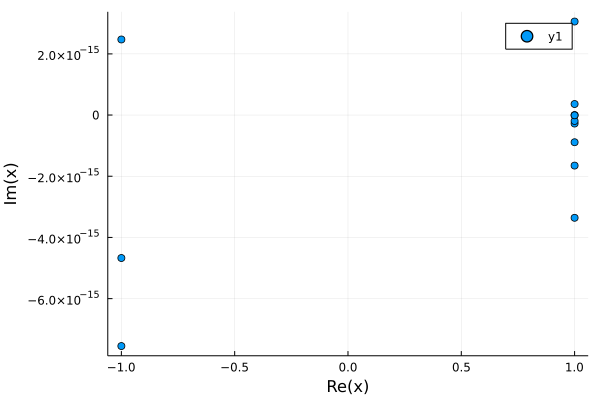

In [103]:
using Plots
plot(lambdas,seriestype = :scatter)

The imaginary bits are tiny! 

# Useful Julia Fragments: Plotting matrices. 

Taken from the "discussions" week 3. Thanks everyone. 

In [ ]:
import Pkg; Pkg.add("PyPlot")

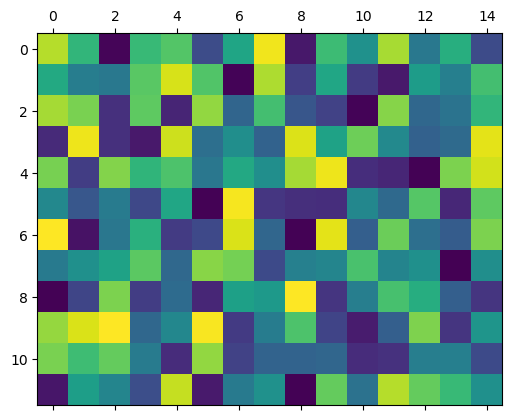

  0.013563 seconds (123 allocations: 5.844 KiB)


PyObject <matplotlib.image.AxesImage object at 0x0000000098EEC430>

In [112]:
using PyPlot
(m,n)=(12,15)
B=rand(m,n)
@time matshow(B)

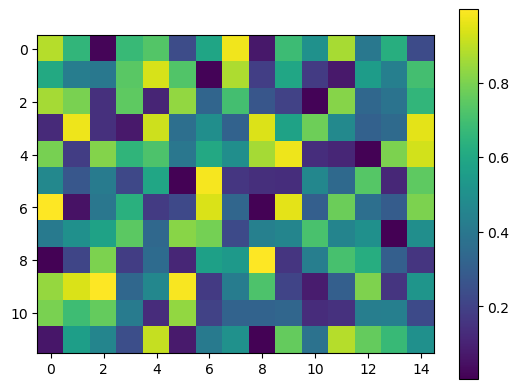

  0.013092 seconds (25 allocations: 800 bytes)


PyObject <matplotlib.colorbar.Colorbar object at 0x0000000099583CA0>

In [113]:
using PyPlot
@time imshow(B)
colorbar()

# Useful Julia Fragments: Matrices. 
1. Square brackets [ ] to get bits of matrices. 
1. ":" for ranges
1. Examples below

In [4]:
(m,n)=(4,5)
B=rand(m,n)

4×5 Matrix{Float64}:
 0.406987    0.316463  0.836893  0.902885   0.199561
 0.00582834  0.975828  0.20429   0.695848   0.710977
 0.159781    0.185162  0.695098  0.0618834  0.24069
 0.109478    0.292409  0.731378  0.498255   0.0914891

In [5]:
B[:,2]

4-element Vector{Float64}:
 0.31646335539234793
 0.9758276079371224
 0.18516173609167175
 0.2924086875616585

In [7]:
B[2:4,2]

3-element Vector{Float64}:
 0.9758276079371224
 0.18516173609167175
 0.2924086875616585

In [8]:
B[1:2,3:5]

2×3 Matrix{Float64}:
 0.836893  0.902885  0.199561
 0.20429   0.695848  0.710977

# Julia Loops
for i in 3:12

In [10]:
s=0.0
for i in 3:12
    s+=1.0
    println(i,"\t",s)
end 

3	1.0
4	2.0
5	3.0
6	4.0
7	5.0
8	6.0
9	7.0
10	8.0
11	9.0
12	10.0


In [ ]:
done

# QR Interpretation

In [33]:
(m,n)=(12,3)
A= rand(m,n)
(QFake, R) = qr(A)
(norm(QFake'*QFake- I), norm(A-QFake*R))

(6.813954736151483e-16, 1.7554167342883506e-16)

In [34]:
Q= Matrix(QFake)
(norm(Q'*Q- I), norm(A-Q*R))

(3.4544961163546573e-16, 4.661082865483435e-16)

In [25]:
x=zeros(12)
x[11:12]=[1 2]
n = QFake*x
dot(n,Q[:,1])

1.6653345369377348e-16